<a href="https://colab.research.google.com/github/sodairahmad/Water_Quality_prediction/blob/main/Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving mastung_data.xlsx to mastung_data.xlsx


In [ ]:
import pandas as pd

# Replace 'mastung_data.xlsx' with the actual file name displayed after upload
file_name = 'mastung_data.xlsx'

# Load the Excel file into a pandas DataFrame
data = pd.read_excel(file_name)

# Display the first few rows of the dataset
print(data.head())

    pH     EC Turbidity   TDS  HCO3 Alkalinity   CO3     K    Na    Ca    Mg  \
0    -  µS/cm       NTU  mg/l  mg/l     mmol/l  mg/l  mg/l  mg/l  mg/l  mg/l   
1  8.1    542       5.9   316   190        3.8     0     1    31    60    17   
2  7.8    538       0.8   309   180        3.6     0     1    28    58    15   
3    8    604       2.5   373   210        4.2     0     1    60    48    17   
4  8.2    610       4.5   377   220        4.4     0     1    58    50    18   

  Hardness    Cl   SO4     As    Fe   PO4 NO3 (N)    Y  
0     mg/l  mg/l  mg/l  (ppb)  mg/l  mg/l    mg/l  NaN  
1      220    40    40      0  0.16  0.03       3  1.0  
2      210    37    38      0  0.05  0.04       2  0.0  
3      190    50    67      0  0.06  0.06       1  0.0  
4      190    48    65      0  0.16  0.08       2  0.0  


In [ ]:
# Clean and rename columns for better usability
data.columns = ['pH', 'EC', 'Turbidity', 'TDS', 'HCO3', 'Alkalinity', 'CO3', 'K',
                'Na', 'Ca', 'Mg', 'Hardness', 'Cl', 'SO4', 'As', 'Fe', 'PO4',
                'NO3_N', 'Y']

# Drop the first row, which contains units, and ensure numeric conversion
data = data.iloc[1:]
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in the target column 'Y'
data = data.dropna(subset=['Y'])

# Separate features (X) and target (Y)
X = data.drop(columns=['Y'])
y = data['Y']

# Display cleaned data summary
X.head(), y.head()

(    pH   EC  Turbidity  TDS  HCO3  Alkalinity  CO3  K  Na  Ca    Mg  Hardness  \
 1  8.1  542        5.9  316   190         3.8    0  1  31  60  17.0       220   
 2  7.8  538        0.8  309   180         3.6    0  1  28  58  15.0       210   
 3  8.0  604        2.5  373   210         4.2    0  1  60  48  17.0       190   
 4  8.2  610        4.5  377   220         4.4    0  1  58  50  18.0       190   
 5  8.0  572        0.1  338   190         3.8    0  0  28  86   9.0       250   
 
    Cl  SO4  As    Fe   PO4  NO3_N  
 1  40   40   0  0.16  0.03      3  
 2  37   38   0  0.05  0.04      2  
 3  50   67   0  0.06  0.06      1  
 4  48   65   0  0.16  0.08      2  
 5  58   35   0  0.04  0.05      2  ,
 1    1.0
 2    0.0
 3    0.0
 4    0.0
 5    0.0
 Name: Y, dtype: float64)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Excel file
file_name = 'mastung_data.xlsx'
data = pd.read_excel(file_name)

# Remove the row containing units (assuming it's the first row)
data = data.iloc[1:].reset_index(drop=True)

# Convert all columns to numeric where possible, setting invalid values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows or columns with excessive missing values if necessary
data = data.dropna(how='all', axis=0)  # Drop rows with all NaN values
data = data.dropna(how='all', axis=1)  # Drop columns with all NaN values

# Select numerical columns only
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Separate features (X) and target (y)
X = data[numerical_columns].drop('Y', axis=1)  # Replace 'target_column' with the actual name of the target column
y = data['Y']  # Replace with the name of the target column

# Initialize the scaler
scaler = StandardScaler()

# Scale only the feature columns (X)
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Now X_scaled contains the scaled features, and y remains unchanged

# Combine X_scaled and y back together if needed
data_scaled = pd.concat([X_scaled, y], axis=1)

# Display the scaled dataset
print("Scaled Data:")
print(data_scaled.head())

# Save the scaled data to a new Excel file (optional)
scaled_file_name = 'mastung_data_scaled.xlsx'
data_scaled.to_excel(scaled_file_name, index=False)
print(f"Scaled data saved to {scaled_file_name}")

Scaled Data:
         pH        EC  Turbidity       TDS      HCO3  Alkalinity       CO3  \
0  0.871894 -0.581372   0.281652 -0.621091 -0.101949   -0.114936 -0.232147   
1 -0.188843 -0.592010  -0.652884 -0.654020 -0.301316   -0.315219 -0.232147   
2  0.518315 -0.416492  -0.341372 -0.352962  0.296785    0.285632 -0.232147   
3  1.225473 -0.400536   0.025113 -0.334146  0.496152    0.485916 -0.232147   
4  0.518315 -0.501591  -0.781153 -0.517603 -0.101949   -0.114936 -0.232147   

          K        Na        Ca        Mg  Hardness        Cl       SO4  \
0 -0.234633 -0.734714  0.088927 -0.447996 -0.208101 -0.432604 -0.697262   
1 -0.234633 -0.793849  0.037273 -0.567534 -0.301013 -0.467540 -0.732006   
2 -0.234633 -0.163071 -0.220997 -0.447996 -0.486836 -0.316149 -0.228209   
3 -0.234633 -0.202494 -0.169343 -0.388227 -0.486836 -0.339440 -0.262954   
4 -1.611146 -0.793849  0.760428 -0.926148  0.070634 -0.222985 -0.784123   

         As        Fe       PO4   NO3 (N)    Y  
0 -0.152499 -0.460

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the entire dataset

# Split scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Define hyperparameter grid (same as before)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type ('elasticnet' removed for compatibility with 'liblinear')
    'solver': ['liblinear', 'saga'],  # Solvers supporting l1, l2
    'class_weight': [None, 'balanced'],  # Handling class imbalance
    'max_iter': [1000, 500000]  # Max iterations for convergence
}

# Create logistic regression model
model = LogisticRegression(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Use the best model from GridSearch
best_model = grid_search.best_estimator_

# Predict on the scaled test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Best Hyperparameters:", grid_search.best_params_)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Confusion Matrix:
 [[20  0]
 [ 5  2]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        20
         1.0       1.00      0.29      0.44         7

    accuracy                           0.81        27
   macro avg       0.90      0.64      0.67        27
weighted avg       0.85      0.81      0.77        27



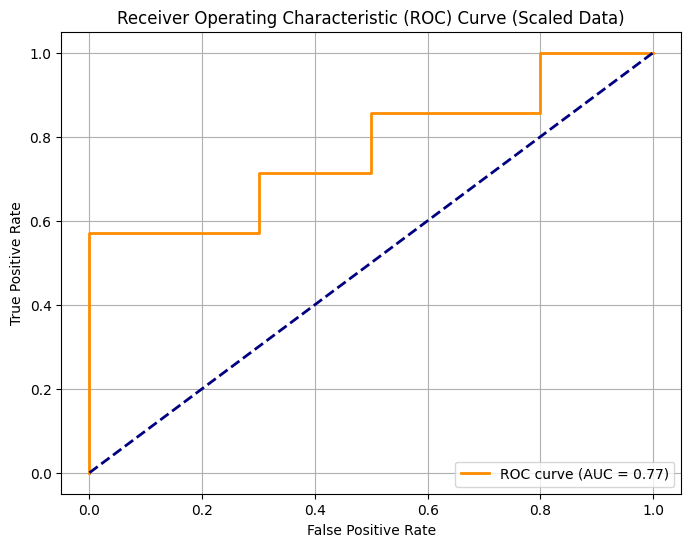

AUC (Scaled Data): 0.77


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set using scaled data
y_prob_scaled = best_model.predict_proba(X_test_scaled)[:, 1]  # Get the probability for the positive class

# Compute ROC curve
fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test, y_prob_scaled)
roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_scaled, tpr_scaled, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_scaled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Scaled Data)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optionally, you can print the AUC value
print(f'AUC (Scaled Data): {roc_auc_scaled:.2f}')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Types of kernels
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'degree': [2, 3, 4],  # Degree for 'poly' kernel
    'class_weight': [None, 'balanced'],  # Handle class imbalance
    'max_iter': [5000, 10000]  # Max iterations for convergence
}

# Create the Support Vector Machine model
svm_model = SVC(random_state=42)

# Perform GridSearchCV to find the best hyperparameters on scaled data
grid_search_scaled = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_scaled.fit(X_train_scaled, y_train)

# Use the best model from GridSearch
best_svm_model_scaled = grid_search_scaled.best_estimator_

# Predict on the scaled test set
y_pred_svm_scaled = best_svm_model_scaled.predict(X_test_scaled)

# Evaluate the SVM model trained on scaled data
conf_matrix_svm_scaled = confusion_matrix(y_test, y_pred_svm_scaled)
class_report_svm_scaled = classification_report(y_test, y_pred_svm_scaled)

# Display results
print("Best Hyperparameters (Scaled Data):", grid_search_scaled.best_params_)
print("Confusion Matrix (Scaled Data):\n", conf_matrix_svm_scaled)
print("Classification Report (Scaled Data):\n", class_report_svm_scaled)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Conside

Best Hyperparameters (Scaled Data): {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 5000}
Confusion Matrix (Scaled Data):
 [[20  0]
 [ 3  4]]
Classification Report (Scaled Data):
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.57      0.73         7

    accuracy                           0.89        27
   macro avg       0.93      0.79      0.83        27
weighted avg       0.90      0.89      0.88        27



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Define the same parameter distribution
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rates
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [3, 4],  # Tree depth
    'subsample': [0.8, 0.9],  # Subsample fraction
    'colsample_bytree': [0.8, 0.9],  # Fraction of features per tree
    'min_child_weight': [1, 3],  # Minimum child weight
    'gamma': [0, 0.1],  # Gamma
    'scale_pos_weight': [1, 2],  # Adjusted for class imbalance
    'lambda': [0, 0.1],  # L2 regularization
    'alpha': [0, 0.1],  # L1 regularization
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42)

# Use RandomizedSearchCV to tune hyperparameters on scaled data
random_search_scaled = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,  # Cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=2,  # Show progress
    scoring='accuracy',  # Performance metric
    random_state=42
)

# Fit the random search model on scaled data
random_search_scaled.fit(X_train_scaled, y_train)

# Get the best model
best_xgb_model_scaled = random_search_scaled.best_estimator_

# Predict on the scaled test set
y_pred_scaled = best_xgb_model_scaled.predict(X_test_scaled)

# Evaluate the model trained on scaled data
cm_scaled = confusion_matrix(y_test, y_pred_scaled)
cr_scaled = classification_report(y_test, y_pred_scaled)

# Output results
print("Best Hyperparameters (Scaled Data):", random_search_scaled.best_params_)
print("Confusion Matrix (Scaled Data):")
print(cm_scaled)
print("\nClassification Report (Scaled Data):")
print(cr_scaled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters (Scaled Data): {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.01, 'lambda': 0.1, 'gamma': 0, 'colsample_bytree': 0.8, 'alpha': 0}
Confusion Matrix (Scaled Data):
[[20  0]
 [ 7  0]]

Classification Report (Scaled Data):
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        20
         1.0       0.00      0.00      0.00         7

    accuracy                           0.74        27
   macro avg       0.37      0.50      0.43        27
weighted avg       0.55      0.74      0.63        27



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:43:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# Define the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid (same as before)
param_dist = {
    'learning_rate': [0.05, 0.1, 0.15],      # Narrow range of learning rates
    'n_estimators': [100, 200, 300],         # Reduced estimators
    'max_depth': [3, 4, 5],                  # Tree depths
    'min_samples_split': [2, 5, 10],         # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],           # Minimum samples in leaf nodes
    'subsample': [0.7, 0.8, 0.9],            # Subsample fractions
}

# Use RandomizedSearchCV for faster hyperparameter tuning on scaled data
random_search_scaled = RandomizedSearchCV(
    estimator=gbm_model,
    param_distributions=param_dist,
    n_iter=20,           # Number of random combinations to try
    cv=3,                # Reduce cross-validation folds to 3
    scoring='precision', # Optimize for precision
    n_jobs=-1,           # Use all available processors
    verbose=2,
    random_state=42      # For reproducibility
)

# Fit the model with scaled data (X_train_scaled and y_train)
random_search_scaled.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_gbm_model_scaled = random_search_scaled.best_estimator_
best_params_scaled = random_search_scaled.best_params_

# Predict on the scaled test set (X_test_scaled)
y_pred_scaled = best_gbm_model_scaled.predict(X_test_scaled)

# Confusion Matrix and Classification Report
cm_scaled = confusion_matrix(y_test, y_pred_scaled)
cr_scaled = classification_report(y_test, y_pred_scaled)

# Output results
print("Best Hyperparameters (Scaled Data):", best_params_scaled)
print("\nConfusion Matrix (Scaled Data):")
print(cm_scaled)
print("\nClassification Report (Scaled Data):")
print(cr_scaled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters (Scaled Data): {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.05}

Confusion Matrix (Scaled Data):
[[20  0]
 [ 3  4]]

Classification Report (Scaled Data):
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.57      0.73         7

    accuracy                           0.89        27
   macro avg       0.93      0.79      0.83        27
weighted avg       0.90      0.89      0.88        27



Fitting 5 folds for each of 256 candidates, totalling 1280 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters (Scaled Data): {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion Matrix (Scaled Data):
[[12  2]
 [ 0  4]]

Classification Report (Scaled Data):
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        14
         1.0       0.67      1.00      0.80         4

    accuracy                           0.89        18
   macro avg       0.83      0.93      0.86        18
weighted avg       0.93      0.89      0.90        18



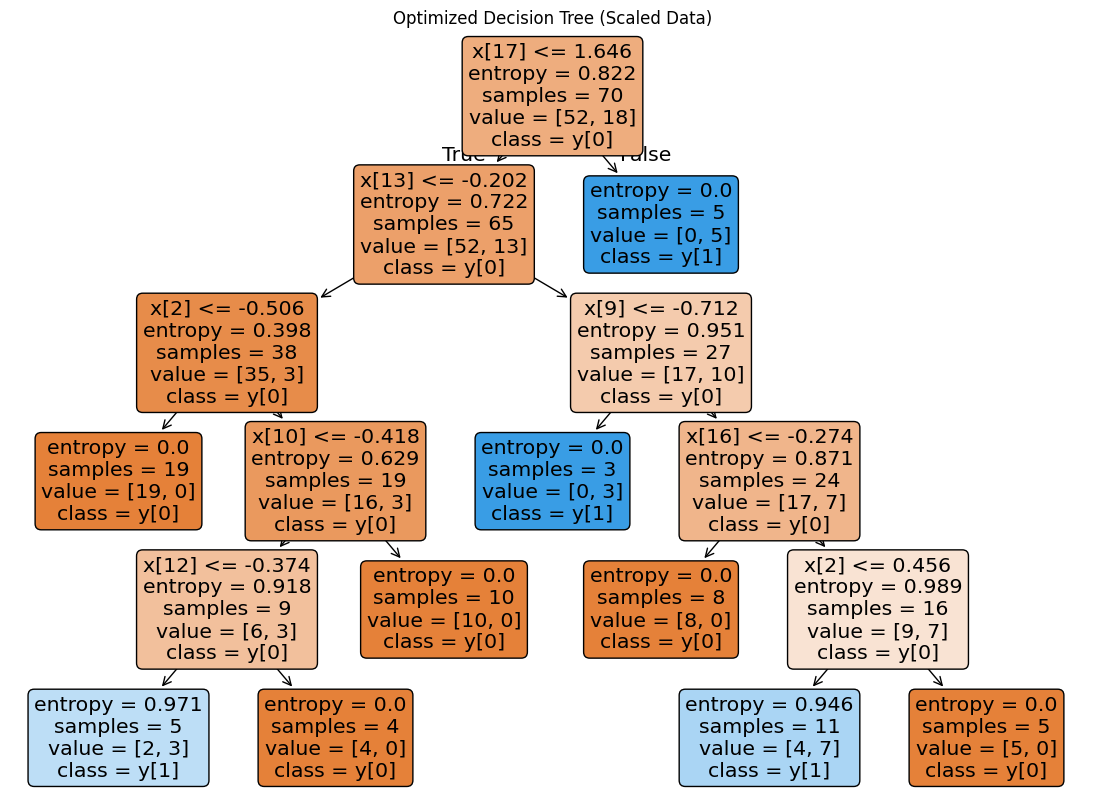

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define a base Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define a grid of hyperparameters for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],                 # Vary the depth of the tree
    'min_samples_split': [2, 5, 10, 20],       # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4, 8],          # Minimum samples in a leaf
    'criterion': ['gini', 'entropy'],          # Try different impurity measures
    'class_weight': [None, 'balanced']         # Consider class balancing
}

# Use GridSearchCV for exhaustive search over the parameter grid
grid_search_scaled = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # Optimize for accuracy
    verbose=2,
    n_jobs=-1              # Use all available cores for computation
)

# Fit the grid search on the scaled training data
grid_search_scaled.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_dt_model_scaled = grid_search_scaled.best_estimator_
best_params_scaled = grid_search_scaled.best_params_

# Predict using the best model
y_pred_scaled = best_dt_model_scaled.predict(X_test_scaled)

# Confusion Matrix and Classification Report
cm_scaled = confusion_matrix(y_test, y_pred_scaled)
cr_scaled = classification_report(y_test, y_pred_scaled)

# Print the results
print("Best Hyperparameters (Scaled Data):", best_params_scaled)
print("\nConfusion Matrix (Scaled Data):")
print(cm_scaled)
print("\nClassification Report (Scaled Data):")
print(cr_scaled)

# Plot the best decision tree for the scaled data
plt.figure(figsize=(14, 10))
plot_tree(best_dt_model_scaled, filled=True, feature_names=None, class_names=True, rounded=True)
plt.title("Optimized Decision Tree (Scaled Data)")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix

# Use the same parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Wider range of smoothing values
    'binarize': [0.0, 0.1, 0.25, 0.5, 0.75, 1.0],           # Adjusted binarization thresholds
    'fit_prior': [True, False]                              # Test both prior options
}

# Initialize BernoulliNB model
nb_model = BernoulliNB()

# Use GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(
    nb_model,
    param_grid,
    cv=10,                  # Use 10-fold CV for better generalization
    scoring='accuracy',     # Optimize for accuracy
    verbose=2,              # Provide detailed logging
    n_jobs=-1               # Use all available processors
)

# Fit the model to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best model and parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions on the scaled test set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print results
print(f"Best Hyperparameters: {best_params}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best Hyperparameters: {'alpha': 5.0, 'binarize': 1.0, 'fit_prior': False}

Confusion Matrix:
[[12  2]
 [ 2  2]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        14
         1.0       0.50      0.50      0.50         4

    accuracy                           0.78        18
   macro avg       0.68      0.68      0.68        18
weighted avg       0.78      0.78      0.78        18



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Assuming the scaled data is available as X_train_scaled, X_test_scaled
# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Test different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Uniform weights vs distance-based
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Different distance metrics
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(
    knn_model,
    param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    verbose=2,
    n_jobs=-1  # Use all available processors
)

# Fit the model to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the scaled test set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the results
print(f"Best Hyperparameters: {best_params}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Confusion Matrix:
[[14  0]
 [ 3  1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        14
         1.0       1.00      0.25      0.40         4

    accuracy                           0.83        18
   macro avg       0.91      0.62      0.65        18
weighted avg       0.86      0.83      0.79        18



<ipython-input-43-b4058503009e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')


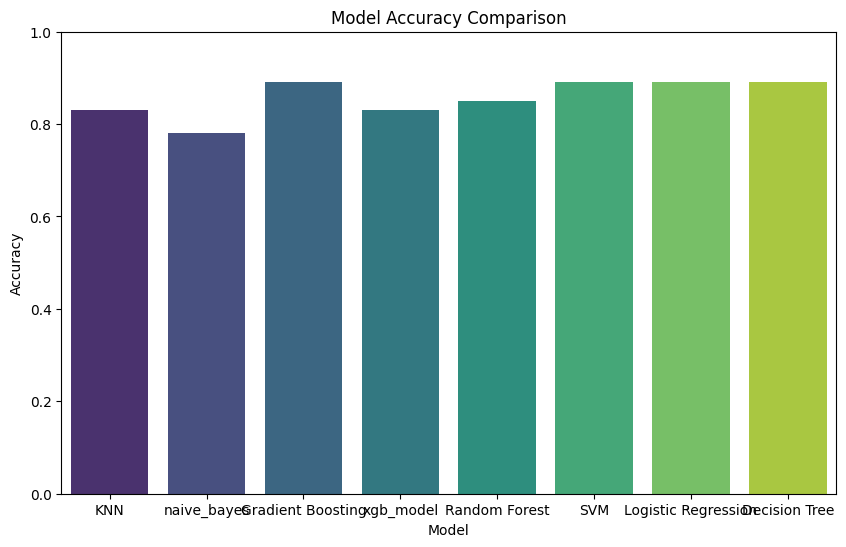

In [ ]:
import seaborn as sns

# Sample accuracy data for different models
accuracy_scores = {'KNN': 0.83,
                   'naive_bayes' : 0.78,
                   'Gradient Boosting' : 0.89,
                   'xgb_model' : 0.83,

    'Random Forest': 0.85,  # Replace with actual accuracy values
    'SVM': 0.89,            # Replace with actual accuracy values
    'Logistic Regression': 0.89,  # Replace with actual accuracy values
    'Decision Tree': 0.89    # Replace with actual accuracy values
}

# Create a bar plot to visualize the accuracy of each model
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()